In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,Application,Length(mm),Width(um),Material_Type,Frequency(MHz),Power(nWatts)
0,1,1.00,0.10,M1,128.0,349.40
1,1,1.00,0.25,M1,128.0,196.10
2,1,1.00,0.40,M1,128.0,142.80
3,1,1.00,0.80,M1,128.0,95.18
4,1,1.00,1.00,M1,128.0,82.37
...,...,...,...,...,...,...
387,11,7.07,0.80,M1,62.5,32.19
388,12,10.00,0.80,M1,500.0,158.10
389,12,10.00,0.80,M1,250.0,138.00
390,12,10.00,0.80,M1,125.0,89.00


# New Section

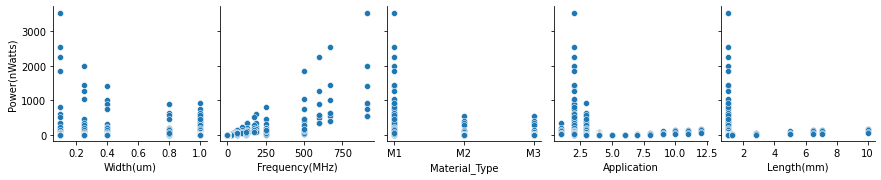

In [ ]:
import numpy as np
import seaborn as sns
# Create the default pairplot
#sns.pairplot(df,kind="reg")
#sns.pairplot(df, hue = 'Width(um)')
#sns.pairplot(df, vars=["Width(um)", "Frequency(MHz)"], hue='Application', height=5, aspect=.8, kind="reg")
sns.pairplot(df, x_vars=["Width(um)", "Frequency(MHz)", "Material_Type","Application","Length(mm)"], y_vars=["Power(nWatts)"])
#sns.lmplot(x="Frequency(MHz)", y="Power(nWatts)", data=df,x_estimator=np.mean)
#sns.jointplot(x="Frequency(MHz)", y="Power(nWatts)", data=df, kind="reg");


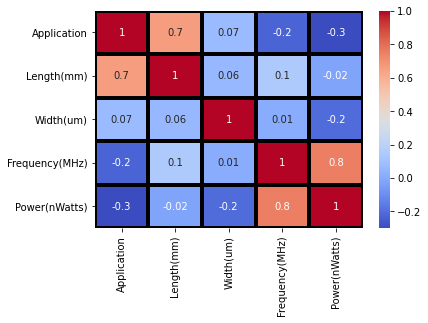

In [ ]:
# Calculating the correlation matrix
corr = df.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot = True, fmt='.1g', cmap= 'coolwarm',linewidths=3, linecolor='black')

In [ ]:
df=df.drop('Application', axis='columns')

## df Hotcoding

In [ ]:
df_dummies = pd.get_dummies(df.Material_Type)
merged = pd.concat([df, df_dummies],axis='columns')
final_df=merged.drop(['Material_Type','M3'],axis='columns')
final_df

,Length(mm),Width(um),Frequency(MHz),Power(nWatts),M1,M2
0,1.00,0.10,128.0,349.40,1,0
1,1.00,0.25,128.0,196.10,1,0
2,1.00,0.40,128.0,142.80,1,0
3,1.00,0.80,128.0,95.18,1,0
4,1.00,1.00,128.0,82.37,1,0
...,...,...,...,...,...,...
387,7.07,0.80,62.5,32.19,1,0
388,10.00,0.80,500.0,158.10,1,0
389,10.00,0.80,250.0,138.00,1,0
390,10.00,0.80,125.0,89.00,1,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

#mean

print ("Mean: ",final_df['Power(nWatts)'].mean())

#median

print ("Median: ",final_df['Power(nWatts)'].median())

#mode

print ("Mode: ",final_df['Power(nWatts)'].mode())

# minimum
print ("Minimum: ",final_df['Power(nWatts)'].min())

#maximum
print ("Maximum: ",final_df['Power(nWatts)'].max())

#variance

print ("Variance: ",final_df['Power(nWatts)'].var(),2)

#standard deviation

print ("std: ",final_df['Power(nWatts)'].std(),2)

#range or spread

print ("range: ",final_df['Power(nWatts)'].max()-final_df['Power(nWatts)'].min())

#skewness usually describesthe lack of symmetry from the mean a perfectly symmetrical data will have a skewness of 0
#for example a normal distribution will have a skewness of 0

print ("skewness: ",round(final_df['Power(nWatts)'].skew(),2))

# kurtosis

#positive kurtosis represents the distribution is more peak towards normal distribution,
# whereas negative kurtosis shows the distribution is less peak towards normal distribution

print ("kurtosis: ",round(final_df['Power(nWatts)'].kurt(),2))



Mean:  110.08197695609356
Median:  0.306
Minimum:  8.8e-09
Maximum:  3549.0
Variance:  115355.61457113163 2
std:  339.6404195191315 2
range:  3548.9999999912
skewness:  5.78
kurtosis:  41.94


In [ ]:
df['Power(nWatts)'].describe()

count    3.920000e+02
mean     1.100820e+02
std      3.396404e+02
min      8.800000e-09
25%      2.249000e-03
50%      3.060000e-01
75%      5.799000e+01
max      3.549000e+03
Name: Power(nWatts), dtype: float64

In [ ]:
X = final_df.drop('Power(nWatts)',axis='columns')
y = final_df['Power(nWatts)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Individual techniques:

### 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5713929846920796

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print(' Root relative square error(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))

Mean Absolute Error(MAE): 115.27873026501105
Mean Squared Error(MSE): 71139.35864788844
Root Mean Squared Error(RMSE): 266.71962553942
 Root relative square error(RRMSE): 0.9544438833246315
Pearsons correlation coefficient(R): 0.761
Coefficient of Determination(R2): 0.5713929846920796


### 3. SVM_Linear

In [ ]:
from sklearn import svm

model = svm.SVR(kernel='linear')
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.41214077280712375

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print(' Root relative square error(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))

Mean Absolute Error(MAE): 82.54247368902142
Mean Squared Error(MSE): 97571.73098928451
Root Mean Squared Error(RMSE): 312.3647403105615
 Root relative square error(RRMSE): 1.8337151566734382
Pearsons correlation coefficient(R): 0.715
Coefficient of Determination(R2): 0.4121407728071237


### 4. SVM_Quadratic:

In [ ]:
from sklearn import svm

model = svm.SVR(kernel='poly', degree=2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3732622110199237

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print(' Root relative square error(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))

Mean Absolute Error(MAE): 91.26351067863412
Mean Squared Error(MSE): 104024.71904573689
Root Mean Squared Error(RMSE): 322.52863290836194
 Root relative square error(RRMSE): 1.6688700833631964
Pearsons correlation coefficient(R): 0.656
Coefficient of Determination(R2): 0.37326221101992374


### 5. SVM_Cubic:

In [ ]:
from sklearn import svm

model = svm.SVR(kernel='poly', degree=3)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3019728214736819

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))


Mean Absolute Error(MAE): 104.12032200474705
Mean Squared Error(MSE): 115857.19324608489
Root Mean Squared Error(RMSE): 340.3780152214371
std(RRMSE): 1.3923948951951917
Pearsons correlation coefficient(R): 0.570
Coefficient of Determination(R2): 0.3019728214736819


### GPR with exponential Kernel

In [ ]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
kernel = ExpSineSquared(length_scale=1, periodicity=1)
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.5357324880886779

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))


Mean Absolute Error(MAE): 78.55416275401663
Mean Squared Error(MSE): 77058.21850511373
Root Mean Squared Error(RMSE): 277.59362115350154
std(RRMSE): 1.7902026336577215
Pearsons correlation coefficient(R): 0.915
Coefficient of Determination(R2): 0.5357324880886779


### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9348477408963333

In [ ]:
y_predicted_DT = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted_DT))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted_DT))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_DT)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted_DT))/np.std(y_predicted_DT))
corr, _ = pearsonr(y_test, y_predicted_DT)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted_DT))

Mean Absolute Error(MAE): 28.411183716709413
Mean Squared Error(MSE): 10813.845227815718
Root Mean Squared Error(RMSE): 103.98964000233734
std(RRMSE): 0.3078155465738806
Pearsons correlation coefficient(R): 0.978
Coefficient of Determination(R2): 0.9348477408963334


## Simple Ensemble Technique

### 1. Max Voting Technique:

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

model_1 = LinearRegression()
model_2 = DecisionTreeRegressor(random_state=1)
model_final = VotingRegressor([('lr', model_1), ('dt', model_2)])



In [ ]:
model_final.fit(X_train,y_train)
model_final.score(X_test,y_test)


0.8046526473656465

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))


Mean Absolute Error(MAE): 28.411183716709413
Mean Squared Error(MSE): 10813.845227815718
Root Mean Squared Error(RMSE): 103.98964000233734
std(RRMSE): 0.3078155465738806
Pearsons correlation coefficient(R): 0.978
Coefficient of Determination(R2): 0.9348477408963334


# Advanced Ensemble techniques

## 1. Stacking 

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = RandomForestRegressor()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
get_stacking()

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9348477408963333

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))


Mean Absolute Error(MAE): 28.411183716709413
Mean Squared Error(MSE): 10813.845227815718
Root Mean Squared Error(RMSE): 103.98964000233734
std(RRMSE): 0.3078155465738806
Pearsons correlation coefficient(R): 0.978
Coefficient of Determination(R2): 0.9348477408963334


## 3. Bagging

#### 3.1 Bagging meta-estimator

In [ ]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9865933686744183

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))

Mean Absolute Error(MAE): 14.97875496576041
Mean Squared Error(MSE): 2225.2065880102073
Root Mean Squared Error(RMSE): 47.17209543798332
std(RRMSE): 0.1190716973180099
Pearsons correlation coefficient(R): 0.994
Coefficient of Determination(R2): 0.9865933686744183


### 3.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=230)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9494444721241703

In [ ]:
y_predicted_RF = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted_RF))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted_RF))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_RF)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted_RF))/np.std(y_predicted_RF))
corr, _ = pearsonr(y_test, y_predicted_RF)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted_RF))


Mean Absolute Error(MAE): 24.866212231719565
Mean Squared Error(MSE): 8391.108173085246
Root Mean Squared Error(RMSE): 91.60299216229373
std(RRMSE): 0.2714067362103255
Pearsons correlation coefficient(R): 0.987
Coefficient of Determination(R2): 0.9494444721241704


## 4. Boosting Technique:

### 4.1 AdaBoost:

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.853642660271042

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))


Mean Absolute Error(MAE): 59.23101198214627
Mean Squared Error(MSE): 24292.10654484776
Root Mean Squared Error(RMSE): 155.8592523556037
std(RRMSE): 0.5492569061107262
Pearsons correlation coefficient(R): 0.961
Coefficient of Determination(R2): 0.853642660271042


### 4.2 Gradient Boosting (GBM):

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.9980546884866249


In [ ]:
y_predicted_gbm = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted_gbm))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted_gbm))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted_gbm))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_gbm)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted_gbm))/np.std(y_predicted_gbm))
corr, _ = pearsonr(y_test, y_predicted_gbm)
print('Pearsons correlation coefficient(R): %.3f' % corr)



Coefficient of Determination(R2): 0.9980546884866248
Mean Absolute Error(MAE): 8.160491549146755
Mean Squared Error(MSE): 322.87902084954385
Root Mean Squared Error(RMSE): 17.968834710396326
std(RRMSE): 0.043319344066750726
Pearsons correlation coefficient(R): 0.999


Gboost with finetuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    "loss":["huber"],
    "learning_rate": [0.1, 0.15, 0.3],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3],
    "subsample":[0.5, 0.75, 0.85, 1.0],
    "alpha": [0.25,0.5,0.75,0.9,0.95],
    "n_estimators":[100]
    }

model1 = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
model1.fit(X_train, y_train)
print(model1.score(X_test,y_test))
print(model1.best_estimator_.learning_rate)

0.6413486808207358
0.3


In [ ]:
y_predicted_gbm1 = model1.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted_gbm1))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted_gbm1))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted_gbm1))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_gbm1)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted_gbm1))/np.std(y_predicted_gbm1))
corr, _ = pearsonr(y_test, y_predicted_gbm1)
print('Pearsons correlation coefficient(R): %.3f' % corr)

Coefficient of Determination(R2): 0.6413486808207358
Mean Absolute Error(MAE): 77.50061204778477
Mean Squared Error(MSE): 59528.24828660824
Root Mean Squared Error(RMSE): 243.9841148243226
std(RRMSE): 1.2249157750654907
Pearsons correlation coefficient(R): 0.910


GBosst with finetuning 1

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

model2 = GradientBoostingRegressor(learning_rate=0.1,loss='huber', n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=2, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
model2.fit(X_train, y_train)
print(model2.score(X_test,y_test))
y_predicted_gbm2 = model2.predict(X_test)

print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted_gbm2))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted_gbm2))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted_gbm2))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_gbm2)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted_gbm2))/np.std(y_predicted_gbm2))
corr, _ = pearsonr(y_test, y_predicted_gbm2)
print('Pearsons correlation coefficient(R): %.3f' % corr)

0.9476857297345196
Coefficient of Determination(R2): 0.9476857297345196
Mean Absolute Error(MAE): 25.493553524542143
Mean Squared Error(MSE): 8683.020813704821
Root Mean Squared Error(RMSE): 93.18272808683389
std(RRMSE): 0.28525725593851586
Pearsons correlation coefficient(R): 0.993


### 4.3 XGBoost

In [ ]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

[12:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9692240010545703

In [ ]:
y_predicted = model.predict(X_test)
from sklearn import metrics
import numpy as np
from scipy.stats import pearsonr

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('std(RRMSE):',np.sqrt(metrics.mean_squared_error(y_test, y_predicted))/np.std(y_predicted))
corr, _ = pearsonr(y_test, y_predicted)
print('Pearsons correlation coefficient(R): %.3f' % corr)
print('Coefficient of Determination(R2):', metrics.r2_score(y_test, y_predicted))


Mean Absolute Error(MAE): 18.17066946308166
Mean Squared Error(MSE): 5108.140437582583
Root Mean Squared Error(RMSE): 71.47125602354126
std(RRMSE): 0.2073120217083242
Pearsons correlation coefficient(R): 0.996
Coefficient of Determination(R2): 0.9692240010545702


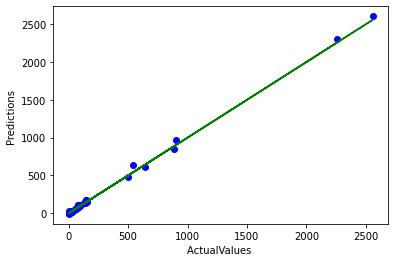

In [ ]:
g=plt.scatter(y_test, y_predicted_gbm, color = "blue")
#h=plt.scatter(y_test, y_predicted_gbm2, color = "red")
#g=plt.scatter(y_test, y_predicted_DT, color = "blue")
g.axes.set_xlabel('ActualValues ')
g.axes.set_ylabel('Predictions ')
#h.axes.set_xlabel('ActualValues ')
#h.axes.set_ylabel('Predictions ')
plt.plot(y_test, y_test, color = "green")

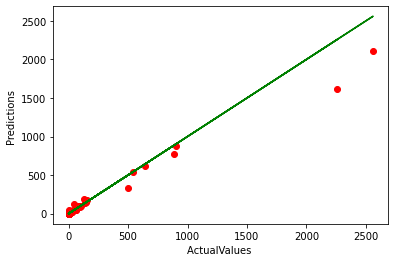

In [ ]:
#g=plt.scatter(y_test, y_predicted_gbm, color = "blue")
h=plt.scatter(y_test, y_predicted_gbm2, color = "red")
#g=plt.scatter(y_test, y_predicted_DT, color = "blue")
#g.axes.set_xlabel('ActualValues ')
#g.axes.set_ylabel('Predictions ')
h.axes.set_xlabel('ActualValues ')
h.axes.set_ylabel('Predictions ')
plt.plot(y_test, y_test, color = "green")

In [ ]:
from sklearn.utils.validation import check_consistent_length, check_array

def mean_absolute_percentage_error(y_test, y_predicted_gbm2,
                                   sample_weight=None,
                                   multioutput='uniform_average'):
    """Mean absolute percentage error regression loss.
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    .. versionadded:: 0.24
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
        If input is list then the shape must be (n_outputs,).
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.
    Returns
    -------
    loss : float or ndarray of floats in the range [0, 1/eps]
        If multioutput is 'raw_values', then mean absolute percentage error
        is returned for each output separately.
        If multioutput is 'uniform_average' or an ndarray of weights, then the
        weighted average of all output errors is returned.
        MAPE output is non-negative floating point. The best value is 0.0.
        But note the fact that bad predictions can lead to arbitarily large
        MAPE values, especially if some y_true values are very close to zero.
        Note that we return a large value instead of `inf` when y_true is zero.
    Examples
    --------
    >>> from sklearn.metrics import mean_absolute_percentage_error
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.3273...
    >>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
    >>> y_pred = [[0, 2], [-1, 2], [8, -5]]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.5515...
    >>> mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])
    0.6198...
    """
    y_type, y_test, y_predicted_gbm2, multioutput = _check_reg_targets(
        y_test, y_predicted_gbm2, multioutput)
    check_consistent_length(y_test, y_predicted_gbm2, sample_weight)
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_predicted_gbm2 - y_test) / np.maximum(np.abs(y_test), epsilon)
    output_errors = np.average(mape,
                               weights=sample_weight, axis=0)
    if isinstance(multioutput, str):
        if multioutput == 'raw_values':
            return output_errors
        elif multioutput == 'uniform_average':
            # pass None as weights to np.average: uniform mean
            multioutput = None

    return np.average(output_errors, weights=multioutput)

def _check_reg_targets(y_test, y_predicted_gbm2, multioutput, dtype="numeric"):
    """Check that y_true and y_pred belong to the same regression task.
    Parameters
    ----------
    y_true : array-like
    y_pred : array-like
    multioutput : array-like or string in ['raw_values', uniform_average',
        'variance_weighted'] or None
        None is accepted due to backward compatibility of r2_score().
    Returns
    -------
    type_true : one of {'continuous', continuous-multioutput'}
        The type of the true target data, as output by
        'utils.multiclass.type_of_target'.
    y_true : array-like of shape (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples, n_outputs)
        Estimated target values.
    multioutput : array-like of shape (n_outputs) or string in ['raw_values',
        uniform_average', 'variance_weighted'] or None
        Custom output weights if ``multioutput`` is array-like or
        just the corresponding argument if ``multioutput`` is a
        correct keyword.
    dtype : str or list, default="numeric"
        the dtype argument passed to check_array.
    """
    check_consistent_length(y_test, y_predicted_gbm2)
    y_test = check_array(y_test, ensure_2d=False, dtype=dtype)
    y_predicted_gbm2 = check_array(y_predicted_gbm2, ensure_2d=False, dtype=dtype)

    if y_test.ndim == 1:
        y_test = y_test.reshape((-1, 1))

    if y_predicted_gbm2.ndim == 1:
        y_predicted_gbm2 = y_predicted_gbm2.reshape((-1, 1))

    if y_test.shape[1] != y_predicted_gbm2.shape[1]:
        raise ValueError("y_true and y_pred have different number of output "
                         "({0}!={1})".format(y_test.shape[1], y_predicted_gbm2.shape[1]))

    n_outputs = y_test.shape[1]
    allowed_multioutput_str = ('raw_values', 'uniform_average',
                               'variance_weighted')
    if isinstance(multioutput, str):
        if multioutput not in allowed_multioutput_str:
            raise ValueError("Allowed 'multioutput' string values are {}. "
                             "You provided multioutput={!r}".format(
                                 allowed_multioutput_str,
                                 multioutput))
    elif multioutput is not None:
        multioutput = check_array(multioutput, ensure_2d=False)
        if n_outputs == 1:
            raise ValueError("Custom weights are useful only in "
                             "multi-output cases.")
        elif n_outputs != len(multioutput):
            raise ValueError(("There must be equally many custom weights "
                              "(%d) as outputs (%d).") %
                             (len(multioutput), n_outputs))
    y_type = 'continuous' if n_outputs == 1 else 'continuous-multioutput'

    return y_type, y_test, y_predicted_gbm2, multioutput

In [ ]:
mean_absolute_percentage_error(y_test, y_predicted_gbm2)

1508847.3864266276